### <center> Сравнение алгоритмов классификации

В рамках данного задания нужно решить задачу классификации с использованием нескольких
алгоритмов классификации: Логистической регрессии, Hаивного Байеса и K-ближайших соседей.

Нужно выполнить следующие шаги:

1. Обработать категориальные признаки известными способами
2. Привести признаки к одинаковому масштабу для тех алгоритмов, для которых это необходимо.
3. Обучить модели классификации с использованием перечисленных алгоритмов. Выбрать метрики качества.
4. Качество модели проверять с помощью кросс-валидации
5. Для каждого алгоритма выполнить поиск гиперпараметров и определить оптимальные параметры. 
Сделать визуализацию зависимости качества модели от гиперпараметров (как было в лекции).
6. Обучить модели с оптимальными параметрами и посмотреть их качество на кросс-валидации, сделать выводы.



**Описание данных:**

**age** - 	numeric,	age of a person

**job** - Categorical,nominal	type of job ('admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

**marital**	- categorical,nominal	marital status ('divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

**education**	- categorical,nominal	('basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

**default** - 	categorical,nominal	has credit in default? ('no','yes','unknown')

**housing** - 	categorical,nominal	has housing loan? ('no','yes','unknown')

**loan**	- categorical,nominal	has personal loan? ('no','yes','unknown')

**contact**	- categorical,nominal	contact communication type ('cellular','telephone')

**month** -	categorical,ordinal	last contact month of year ('jan', 'feb', 'mar', …, 'nov', 'dec')

**dayofweek**	- categorical, ordinal	last contact day of the week ('mon','tue','wed','thu','fri')

**duration** -	numeric,	last contact duration, in seconds . Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no')

**campaign** -	numeric,	number of contacts performed during this campaign and for this client (includes last contact)

**pdays** -	numeric,	number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)
**previous** - numeric,	number of contacts performed before this campaign and for this client
**poutcome** -	categorical,nominal	outcome of the previous marketing campaign ('failure','nonexistent','success')

**y** -	binary, 	has the client subscribed a term deposit? ('yes','no')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv('D:/Документы/Учёба/Магистратура/2 семестр/Классические методы машинного обучения/new_train.csv')
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no


In [3]:
data.describe()

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


In [4]:
print(data.job.value_counts())
print('--------------------------------------------------')
print(data.marital.value_counts())
print('--------------------------------------------------')
print(data.education.value_counts())
print('--------------------------------------------------')
print(data.default.value_counts())
print('--------------------------------------------------')
print(data.housing.value_counts())
print('--------------------------------------------------')
print(data.loan.value_counts())
print('--------------------------------------------------')
print(data.contact.value_counts())
print('--------------------------------------------------')
print(data.poutcome.value_counts())
print('--------------------------------------------------')
print(data.y.value_counts())
print('--------------------------------------------------')

admin.           8314
blue-collar      7441
technician       5400
services         3196
management       2345
retired          1366
entrepreneur     1160
self-employed    1099
housemaid         855
unemployed        798
student           711
unknown           265
Name: job, dtype: int64
--------------------------------------------------
married     19953
single       9257
divorced     3675
unknown        65
Name: marital, dtype: int64
--------------------------------------------------
university.degree      9736
high.school            7596
basic.9y               4826
professional.course    4192
basic.4y               3322
basic.6y               1865
unknown                1397
illiterate               16
Name: education, dtype: int64
--------------------------------------------------
no         26007
unknown     6940
yes            3
Name: default, dtype: int64
--------------------------------------------------
yes        17254
no         14900
unknown      796
Name: housing, dtype: in

Можно увидеть, что у некоторых признаков есть категории, которые составляют малую долю от общего числа наблюдений. Ими, в принципе, можно пренебречь. Также, можно провести более подробный анализ, и, возможно, можно будет объединить несколько категорий в одну.

Но я решил построить модель на данных, где каждой категории присвоено определённое числовое значение (1,2 и т.д.), т.е. не объединять признаки в группы. Посмотрим, насколько точной выйдет модель.

Для построения моделей обрабатываем имеющиеся категориальные признаки:

In [5]:
df = data.copy()
df['job'] = df['job'].map({'admin.': 1, 'blue-collar': 2, 'entrepreneur': 3, 'housemaid': 4, 'management': 5, 'retired': 6, 'self-employed': 7, 'services': 8, 'student': 9, 'technician': 10, 'unemployed': 11, 'unknown': 0})
df['marital'] = df['marital'].map({'divorced': 1, 'married': 2, 'single': 3, 'unknown': 0})
df['education'] = df['education'].map({'basic.4y': 1, 'basic.6y': 2, 'basic.9y': 3, 'high.school': 4, 'illiterate': 5, 'professional.course': 6, 'university.degree': 7, 'unknown': 0})
df['default'] = df['default'].map({'no': 1, 'yes': 2, 'unknown': 0})
df['housing'] = df['housing'].map({'no': 1, 'yes': 2, 'unknown': 0})
df['loan'] = df['loan'].map({'no': 1, 'yes': 2, 'unknown': 0})
df['contact'] = df['contact'].map({'cellular': 0, 'telephone': 1})
df['poutcome'] = df['poutcome'].map({'nonexistent': 0, 'success': 1, 'failure': 2})
df['month'] = df['month'].map({'mar': 0, 'apr': 1, 'may': 2, 'jun': 3, 'jul': 4, 'aug': 5, 'sep': 6, 'oct': 7, 'nov': 8, 'dec': 9})
df['day_of_week'] = df['day_of_week'].map({ 'mon': 0, 'tue': 1, 'wed': 2, 'thu': 3, 'fri': 4})
df['y'] = df['y'].map({'no': 0, 'yes': 1})
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,2,2,3,0,1,1,0,8,2,227,4,999,0,0,0
1,37,3,2,7,1,1,1,1,8,2,202,2,999,1,2,0
2,78,6,2,1,1,1,1,0,4,0,1148,1,999,0,0,1
3,36,1,2,7,1,2,1,1,2,0,120,2,999,0,0,0
4,59,6,1,7,1,1,1,0,3,1,368,2,999,0,0,0


Нормализацию данных целесообразно произвести для алгоритма K-ближайших соседей и Логистической регрессии. Проведём нормализацию с помощью метода MinMax.

Приводим все признаки к одинаковому масштабу:

In [6]:
min_max_scaler = MinMaxScaler()
df_norm = pd.DataFrame(min_max_scaler.fit_transform(df), columns=df.columns)
df_norm.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,0.395062,0.181818,0.666667,0.428571,0.0,0.5,0.5,0.0,0.888889,0.50,0.046157,0.054545,1.0,0.000000,0.0,0.0
1,0.246914,0.272727,0.666667,1.000000,0.5,0.5,0.5,1.0,0.888889,0.50,0.041074,0.018182,1.0,0.142857,1.0,0.0
2,0.753086,0.545455,0.666667,0.142857,0.5,0.5,0.5,0.0,0.444444,0.00,0.233428,0.000000,1.0,0.000000,0.0,1.0
3,0.234568,0.090909,0.666667,1.000000,0.5,1.0,0.5,1.0,0.222222,0.00,0.024400,0.018182,1.0,0.000000,0.0,0.0
4,0.518519,0.545455,0.333333,1.000000,0.5,0.5,0.5,0.0,0.333333,0.25,0.074827,0.018182,1.0,0.000000,0.0,0.0


In [7]:
# Строим модель логистической регрессии

x = df_norm[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan','contact', 'duration','campaign', 'pdays','previous','poutcome']]
y = df_norm['y']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
LR = LogisticRegression()
LR_model = LR.fit(x_train, y_train) 

pred_train = LR_model.predict(x_train) 

In [8]:
LR_scores = cross_val_score(LR, x, y, cv=5, scoring='precision')
LR_scores.mean()

0.6508299853700604

In [9]:
# Строим модель Гауссовского наивного классификатора

x = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan','contact', 'duration','campaign', 'pdays','previous','poutcome']]
y = df['y']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

GNB = GaussianNB()
batch = 200
GNB.fit(x, y)
predict = GNB.predict(x_test)
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7258
           1       0.46      0.46      0.46       980

    accuracy                           0.87      8238
   macro avg       0.69      0.69      0.69      8238
weighted avg       0.87      0.87      0.87      8238



In [10]:
GNB_scores = cross_val_score(GNB, x, y, cv=5, scoring='precision')
GNB_scores.mean()

0.4366067794046278

In [11]:
# Строим модель K-ближайших соседей

X = df_norm[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan','contact', 'duration','campaign', 'pdays','previous','poutcome']]
y = df_norm['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

KNC = KNeighborsClassifier()

KNC_scores = cross_val_score(KNC, X, y, cv=5, scoring='precision')
print(KNC_scores.mean())

0.553040520844651


Лучший результат из рассмотренных алгоритмов показала модель Логистической регрессии.

## Поиск оптимальных гиперпараметров и построение моделей с найденными параметрами

Для нахождения оптимальных гиперпараметров воспользуемся инструментом GridSearchCV:

In [12]:
# Создаем объект модели Логистической регрессии
LR = LogisticRegression()

# Задаем словарь с сеткой значений гиперпапаметров
param_grid = {"penalty": ['l2'],
              "C": np.logspace(0, 4, 10)}

# Создаем объект GridSearchCV, передаем ему объект модели и сетку параметров для поиска
grid_search = GridSearchCV(LR, param_grid=param_grid, cv=5, scoring='precision')
# Ищем оптимальные параметры 
grid_search.fit(X, y)

# summarize resultv
print('Best Score: %s' % grid_search.best_score_)
print('Best Hyperparameters: %s' % grid_search.best_params_)

Best Score: 0.6525005177540368
Best Hyperparameters: {'C': 2.7825594022071245, 'penalty': 'l2'}


In [13]:
LR_optim = LogisticRegression(C = 2.7825594022071245, penalty = 'l2')
scores = cross_val_score(LR_optim, X, y, cv=5, scoring='precision')

print("Значения точности при перекрестной проверке: \n{}".format(scores))
print('_'*50)
print("Среднее значение перекрестной проверки: {:.2f} \nStd: {:.3f}".format(scores.mean(), scores.std()))

Значения точности при перекрестной проверке: 
[0.65311653 0.67945205 0.59078591 0.65183246 0.68731563]
__________________________________________________
Среднее значение перекрестной проверки: 0.65 
Std: 0.034


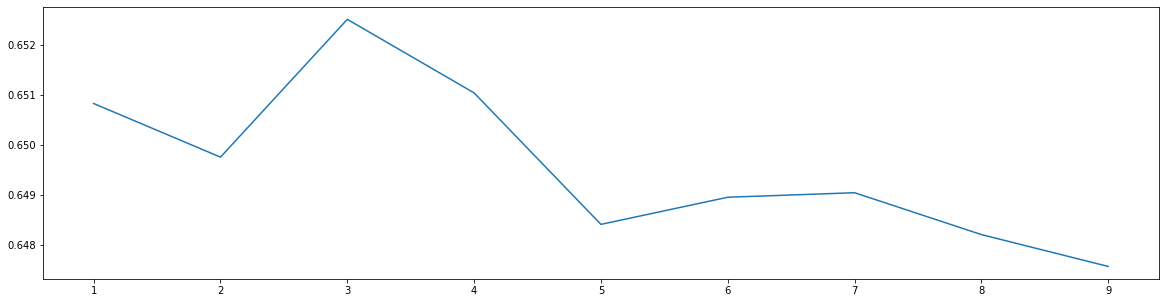

In [14]:
plt.figure(figsize=(20, 5))
C, score = [], []
for n in range(1,10):
    C.append(n)
    LR_optim = LogisticRegression(C = n)
    mean_precision = cross_val_score( LR_optim, X, y, cv=5, scoring='precision').mean()
    score.append(mean_precision)
    
plt.plot(C, score);

In [15]:
# Создаем объект модели Гауссовского наивного классификатора
GNB = GaussianNB()

# Задаем словарь с сеткой значений гиперпапаметров
param_grid = {'var_smoothing': [0.00000001, 0.5]}

# Создаем объект GridSearchCV, передаем ему объект модели и сетку параметров для поиска
grid_search = GridSearchCV(GNB, param_grid=param_grid, cv=5, scoring='precision')
# Ищем оптимальные параметры 
grid_search.fit(X, y)

# summarize resultv
print('Best Score: %s' % grid_search.best_score_)
print('Best Hyperparameters: %s' % grid_search.best_params_)

Best Score: 0.6359420635304467
Best Hyperparameters: {'var_smoothing': 0.5}


In [16]:
GNB_optim = GaussianNB(var_smoothing = 0.5)
scores = cross_val_score(GNB_optim, X, y, cv=5, scoring='precision')

print("Значения точности при перекрестной проверке: \n{}".format(scores))
print('_'*50)
print("Среднее значение перекрестной проверки: {:.2f} \nStd: {:.3f}".format(scores.mean(), scores.std()))

Значения точности при перекрестной проверке: 
[0.66956522 0.66666667 0.57391304 0.6359447  0.63362069]
__________________________________________________
Среднее значение перекрестной проверки: 0.64 
Std: 0.034


D:\Programs\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programs\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programs\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programs\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defin

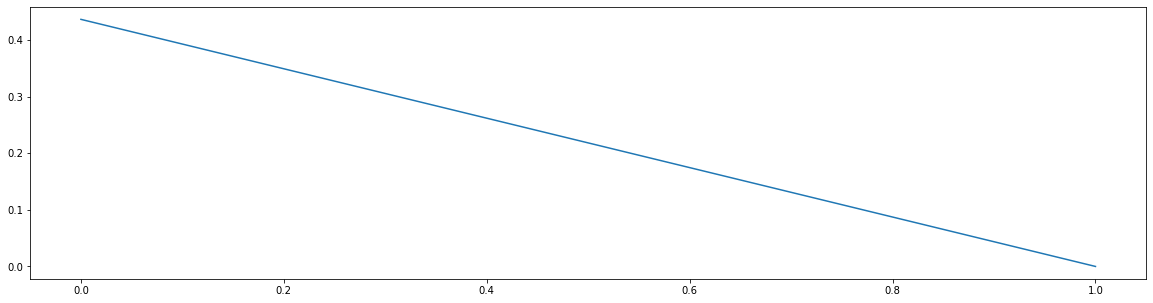

In [17]:
plt.figure(figsize=(20, 5))
var_smoothing, score = [], []
for n in range(0, 2):
    var_smoothing.append(n)
    GNB_optim = GaussianNB(var_smoothing = n)
    mean_precision = cross_val_score(GNB_optim, X, y, cv=5, scoring='precision').mean()
    score.append(mean_precision)
    
plt.plot(var_smoothing, score);

Так и не понял, как правильно работать с поиском гиперпараметров у Гауссовского наивного классификатора. Не смог построить корректный график =(

In [18]:
# Создаем объект модели K-ближайших соседей
KNC = KNeighborsClassifier()

# Задаем словарь с сеткой значений гиперпапаметров
param_grid = {'n_neighbors': [i for i in range(1, 30, 1)],
              'weights':['uniform', 'distance']}

# Создаем объект GridSearchCV, передаем ему объект модели и сетку параметров для поиска
grid_search = GridSearchCV(KNC, param_grid=param_grid, cv=5, scoring='precision')
# Ищем оптимальные параметры 
grid_search.fit(X, y)

# summarize resultv
print('Best Score: %s' % grid_search.best_score_)
print('Best Hyperparameters: %s' % grid_search.best_params_)

Best Score: 0.6494375468356155
Best Hyperparameters: {'n_neighbors': 18, 'weights': 'uniform'}


In [19]:
KNC_optim = KNeighborsClassifier(n_neighbors=18, weights='uniform')
scores = cross_val_score(KNC_optim, X, y, cv=5, scoring='precision')

print("Значения точности при перекрестной проверке: \n{}".format(scores))
print('_'*50)
print("Среднее значение перекрестной проверки: {:.2f} \nStd: {:.3f}".format(scores.mean(), scores.std()))

Значения точности при перекрестной проверке: 
[0.68981481 0.65625    0.60085837 0.65740741 0.64285714]
__________________________________________________
Среднее значение перекрестной проверки: 0.65 
Std: 0.029


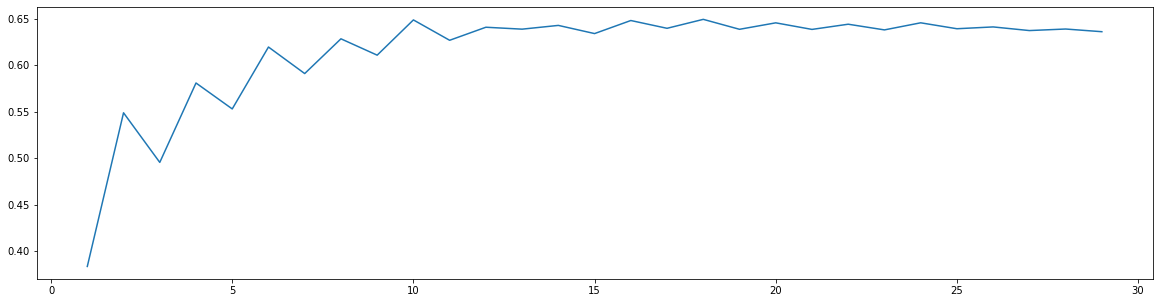

In [20]:
plt.figure(figsize=(20, 5))
n_neighbors_list, score = [], []
for n in range(1,30):
    n_neighbors_list.append(n)
    KNC_optim = KNeighborsClassifier(n_neighbors=n)
    mean_precision = cross_val_score(KNC_optim, X, y, cv=5, scoring='precision').mean()
    score.append(mean_precision)
    
plt.plot(n_neighbors_list, score);

С подобранными оптимальными гиперпараметрами модели показали примерно равное качество.